In [9]:
import numpy as np
import matplotlib.pylab as plt
from pandas_ml import ConfusionMatrix
import sys
sys.path.insert(0, '../zdrojaky/logreg')
from logreg import LogReg

# Logistic regression

The example considers the Skin-NonSkin dataset of Bhatt and Dhall. It consists of 245,057 samples of which 50,859 are skin samples and 194,198 are non-skin samples. The dataset was collected by randomly sampling RGB values from face images of various age groups (young, middle, and old), race groups (white, black, and Asian), and gender. The samples were obtained from the FERET and PAL databases. Each data item consists of four variables -- B, G, R and the class label.

Three randomly chosen rows:

    ---
    B, G, R, Class
    242, 169, 161,   2
    218, 211, 202,   2
    110, 150, 209,   1
    ---
    
**We will use the regressor $x_t = [1, B_t, G_t, R_t]$, normal prior $\mathcal{N}$(**_0_**, 100**_I_**) and the threshold _m_=0.5.**

First, we load data. As they are ordered, we need to shuffle them.

In [10]:
np.random.seed(1234)
ndat = 1000

fn = 'Skin_NonSkin.txt'
data = np.loadtxt(fn)
np.random.shuffle(data)

print(data[:3])

[[ 242.  169.  161.    2.]
 [ 218.  211.  202.    2.]
 [ 110.  150.  209.    1.]]


Note the classes are 1 a 2 (Skin a NonSkin). 


**Task 1: Modify the classes to be 0 and 1.**


**Task 2: Prepare regressors (X) and measurements (y).**

In [11]:
XXXXX
XXXXX

X = 
y = 

We start with the prior $\mathcal{N}([0, 0, 0, 0], 100I_{4\times 4}).$

In [12]:
#%% Prior
mean = np.zeros(X.shape[-1])
Sigma = np.eye(X.shape[-1]) * 100.
prior = LogReg(mean=mean, Sigma=Sigma)

Estimation: we update by one regressor and one measurements sequentially (Skin-NonSkin)

In [13]:
#%% Estimation
for xt, yt in zip(X, y):
    prior.update(yt, xt)
    prior.log()
    

Let us see the Brier score evolution.

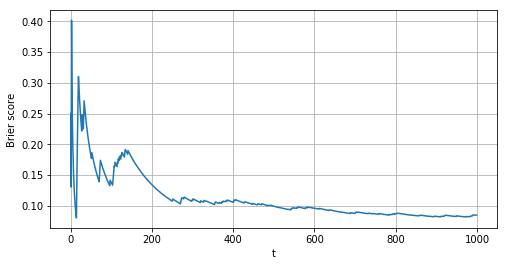

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(prior.brier_score_log)
plt.xlabel('t')
plt.ylabel('Brier score')

Finally, we calculate the confusion matrix.

In [15]:
#%% Confusion matrix
CM = ConfusionMatrix(prior.true_vals, prior.binary_preds)
CM.print_stats()

population: 1000
P: 770
N: 230
PositiveTest: 761
NegativeTest: 239
TP: 719
TN: 188
FP: 42
FN: 51
TPR: 0.933766233766
TNR: 0.817391304348
PPV: 0.944809461235
NPV: 0.786610878661
FPR: 0.182608695652
FDR: 0.0551905387648
FNR: 0.0662337662338
ACC: 0.907
F1_score: 0.939255388635
MCC: 0.741223246966
informedness: 0.751157538114
markedness: 0.731420339896
prevalence: 0.77
LRP: 5.11348175634
LRN: 0.0810306714562
DOR: 63.1055088702
FOR: 0.213389121339
